In [1]:
import sys
sys.path.append("/Users/danieleraimondi/bitcoin_datascience/functions")
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import sys

sys.path.append("/Users/danieleraimondi/bitcoin_datascience/functions")

from functions_AvailableSupply import (
    forecast_supply,
    lost_coins_estimation,
    final_plot,
    loss_rates_plot,
    coins_lost_percentage,
)

# Load Bitcoin price data
btc_data = pd.read_csv("../data/btc.csv", parse_dates=["time"])

# 'time' column in datetime format
btc_data["time"] = pd.to_datetime(btc_data["time"])
btc_data["Supply"] = btc_data["CapMrktCurUSD"] / btc_data["PriceUSD"]

Importing plotly failed. Interactive plots will not work.


In [2]:
forecast = forecast_supply(btc_data, years=15)

14:43:10 - cmdstanpy - INFO - Chain [1] start processing


14:43:14 - cmdstanpy - INFO - Chain [1] done processing


In [3]:
forecast = lost_coins_estimation(btc_data, forecast)

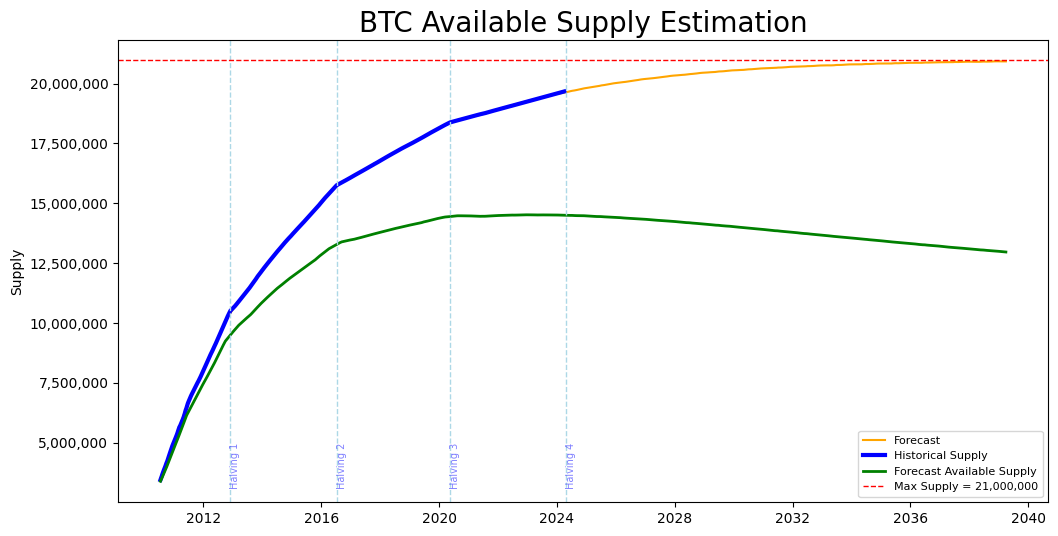

In [4]:
final_plot(btc_data, forecast)

In [5]:
#loss_rates_plot(forecast)

In [6]:
coins_lost_percentage(btc_data, forecast)

'Percentage of coins lost: 26.12 %'